In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Processing Alternaria images:   0%|          | 0/565 [00:00<?, ?it/s]

Processing Dieback images:   0%|          | 0/565 [00:00<?, ?it/s]

Processing Healthy images:   0%|          | 0/565 [00:00<?, ?it/s]

Processing Leaf_Blight images:   0%|          | 0/566 [00:00<?, ?it/s]

Processing Leaf_Miners_Powdery_Mildew images:   0%|          | 0/565 [00:00<?, ?it/s]

Processing Powdery_Mildew images:   0%|          | 0/565 [00:00<?, ?it/s]

Images shape: (3391, 224, 224, 3)
Labels shape: (3391,)
Saved segmented image: /content/drive/MyDrive/neem_segmented/Alternaria/Alternaria158.jpg
Saved segmented image: /content/drive/MyDrive/neem_segmented/Alternaria/Alternaria82.jpg
Saved segmented image: /content/drive/MyDrive/neem_segmented/Alternaria/Alternaria170.jpg
Saved segmented image: /content/drive/MyDrive/neem_segmented/Alternaria/Alternaria83.jpg
Saved segmented image: /content/drive/MyDrive/neem_segmented/Alternaria/Alternaria41.jpg
Saved segmented image: /content/drive/MyDrive/neem_segmented/Alternaria/Alternaria171.jpg
Saved segmented image: /content/drive/MyDrive/neem_segmented/Alternaria/Alternaria5.jpg
Saved segmented image: /content/drive/MyDrive/neem_segmented/Alternaria/Alternaria159.jpg
Saved segmented image: /content/drive/MyDrive/neem_segmented/Alternaria/Alternaria55.jpg
Saved segmented image: /content/drive/MyDrive/neem_segmented/Alternaria/Alternaria165.jpg
Saved segmented image: /content/drive/MyDrive/neem

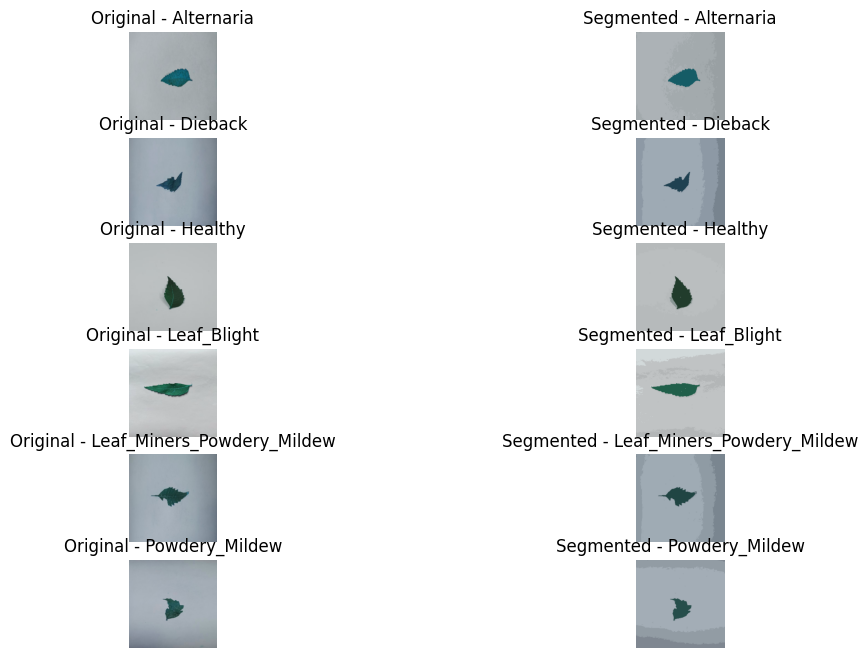

In [ ]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Define the path to the extracted dataset
data_path = '/content/drive/MyDrive/neem_dataset'
segmented_path = '/content/drive/MyDrive/neem_segmented'

# Set up paths to each class
class_names = ['Alternaria', 'Dieback', 'Healthy', 'Leaf_Blight', 'Leaf_Miners_Powdery_Mildew', 'Powdery_Mildew']
class_paths = {name: os.path.join(data_path, name) for name in class_names}
segmented_class_paths = {name: os.path.join(segmented_path, name) for name in class_names}

# Create segmented image folders
os.makedirs(segmented_path, exist_ok=True)
for class_name in class_names:
    os.makedirs(segmented_class_paths[class_name], exist_ok=True)

# Define the target size for resizing
target_size = (224, 224)

def load_images(class_names, class_paths):
    images = []
    labels = []
    file_paths = []

    for class_name in class_names:
        class_path = class_paths[class_name]
        for image_file in tqdm(os.listdir(class_path), desc=f"Processing {class_name} images"):
            img_path = os.path.join(class_path, image_file)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img, target_size)
                img = img.astype(np.float32) / 255.0
                images.append(img)
                labels.append(class_name)
                file_paths.append(image_file)

    images = np.array(images, dtype=np.float32)
    labels = np.array(labels)
    return images, labels, file_paths

# Load and preprocess images
images, labels, file_paths = load_images(class_names, class_paths)

# Display the shape of the images and labels
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

def kmeans_segmentation(image, k=7, attempts=10):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()].reshape(image.shape)
    return segmented_image

# Process and save segmented images
for i, (image, label, file_name) in enumerate(zip(images, labels, file_paths)):
    segmented = kmeans_segmentation((image * 255).astype(np.uint8), k=7)
    save_path = os.path.join(segmented_class_paths[label], file_name)
    cv2.imwrite(save_path, cv2.cvtColor(segmented, cv2.COLOR_RGB2BGR))
    print(f"Saved segmented image: {save_path}")




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


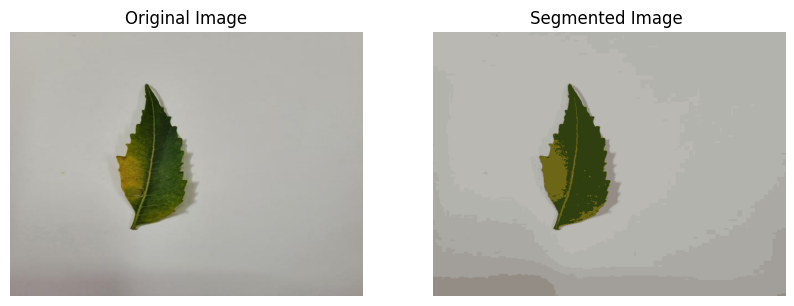

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def kmeans_segmentation(image_path, k=7, attempts=10):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Reshape image into a 2D array of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define K-means clustering criteria and apply KMeans
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8 and map labels to colors
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]

    # Reshape segmented image back to original shape
    segmented_image = segmented_image.reshape(image.shape)

    return image, segmented_image

# Example usage
image_path = '/content/drive/MyDrive/neem_dataset/Alternaria/Alternaria104.jpg'  # Change this to your image path
original, segmented = kmeans_segmentation(image_path, k=7)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented)
plt.title('Segmented Image ')
plt.axis('off')

plt.show()
